# Eleitores Idosos

Agora que já sabemos o etsado e os municípios com maior número de casos, vamos para a segunda parte do nosso trabalho e analisar o perfil do eleitorado nesses municípios, com enfâse no eleitor com mais de 60 anos.

In [17]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [18]:
filename = r'C:\Users\gabri\Downloads\perfil_eleitorado_2020.csv'
dadosEleicao = pd.read_csv(filename, delimiter=';', encoding = 'latin-1')

#### Primeiro nós iremos filtrar  e agrupar os dados para facilitar a nossa análise

Aqui nós escolhemos apenas as colunas que nos interessam para a análise, que são as que contém o nome do município, a faixa etaria do eleitor, e o código da faixa etária, para facilitar o agrupamento.

In [19]:
selecionadas = ['NM_MUNICIPIO','DS_FAIXA_ETARIA', 'CD_FAIXA_ETARIA']  
eleicaoSelecionadas = dadosEleicao.filter(items=selecionadas)

Depois iremos agrupar os dados de acordo com os cinco municípios que estão com o maior índice de casos de COVID-19, como fimos na outra análise.

In [20]:
sp = eleicaoSelecionadas.query('NM_MUNICIPIO == "SÃO PAULO"') 
camp = eleicaoSelecionadas.query('NM_MUNICIPIO == "CAMPINAS"')
sjrp = eleicaoSelecionadas.query('NM_MUNICIPIO == "SÃO JOSÉ DO RIO PRETO"')
sbc = eleicaoSelecionadas.query('NM_MUNICIPIO == "SÃO BERNARDO DO CAMPO"')
rp = eleicaoSelecionadas.query('NM_MUNICIPIO == "RIBEIRÃO PRETO"')


Agora iremos agrupar os dados referente a idade dos eleitores em cada um dos municípios, e dividi-los em duas categorias: os idosos, contendo os eleitores com idade igual ou superior a 60 anos, e os não idosos, que contém idade igual ou inferior a 59 anos.

In [21]:
faixaEtariaSP = sp['CD_FAIXA_ETARIA'].value_counts()
faixaEtariaCAMP = camp['CD_FAIXA_ETARIA'].value_counts()
faixaEtariaSJRP = sjrp['CD_FAIXA_ETARIA'].value_counts()
faixaEtariaSBC = sbc['CD_FAIXA_ETARIA'].value_counts()
faixaEtariaRP = rp['CD_FAIXA_ETARIA'].value_counts()

Para facilitar, iremos definir funções que irão dividir o eleitores em grupos de idades, para utilizarmos nos gráficos

In [389]:
def idosos(y):
    x=0
    idoso = [6064, 6569, 7074, 7579, 8084, 8589, 9094, 9599, 9999]
    grpRisco = []
    outro = []
    for i in range(23):
        i+=1
        if y.index[x] in idoso: 
            grpRisco.append(y.values[x])
            x+=1
        else:
            outro.append(y.values[x])
            x+=1
    return grpRisco

def dezenove(y):
    x=0
    a = [1600, 1700, 1800, 1900]
    b = []
    outro = []
    for i in range(23):
        i+=1
        if y.index[x] in a: 
            b.append(y.values[x])
            x+=1
        else:
            outro.append(y.values[x])
            x+=1
    return b

def vinte(y):
    x=0
    a = [2000, 2124, 2529]
    b = []
    outro = []
    for i in range(23):
        i+=1
        if y.index[x] in a: 
            b.append(y.values[x])
            x+=1
        else:
            outro.append(y.values[x])
            x+=1
    return b

def trinta(y):
    x=0
    a = [3034, 3539]
    b = []
    outro = []
    for i in range(23):
        i+=1
        if y.index[x] in a: 
            b.append(y.values[x])
            x+=1
        else:
            outro.append(y.values[x])
            x+=1
    return b

def quarenta(y):
    x=0
    a = [3034, 3539]
    b = []
    outro = []
    for i in range(23):
        i+=1
        if y.index[x] in a: 
            b.append(y.values[x])
            x+=1
        else:
            outro.append(y.values[x])
            x+=1
    return b

def cinquenta(y):
    x=0
    a = [3034, 3539]
    b = []
    outro = []
    for i in range(23):
        i+=1
        if y.index[x] in a: 
            b.append(y.values[x])
            x+=1
        else:
            outro.append(y.values[x])
            x+=1
    return b

Nosso primeiro gráfico será referente a quantidade de eleitores com mais de 60 anos, assim, iremos visualizar qual cidade tem o maior número de eleitores nessa faixa etária.

In [383]:
QtdIdosos = [sum(idosos(faixaEtariaSP)),sum(idosos(faixaEtariaCAMP)),sum(idosos(faixaEtariaSJRP)),sum(idosos(faixaEtariaSBC)),sum(idosos(faixaEtariaRP))]
cidades = ['São Paulo', 'Campinas', 'São José do Rio Preto', 'São Bernardo do Campo','Ribeirão Preto']


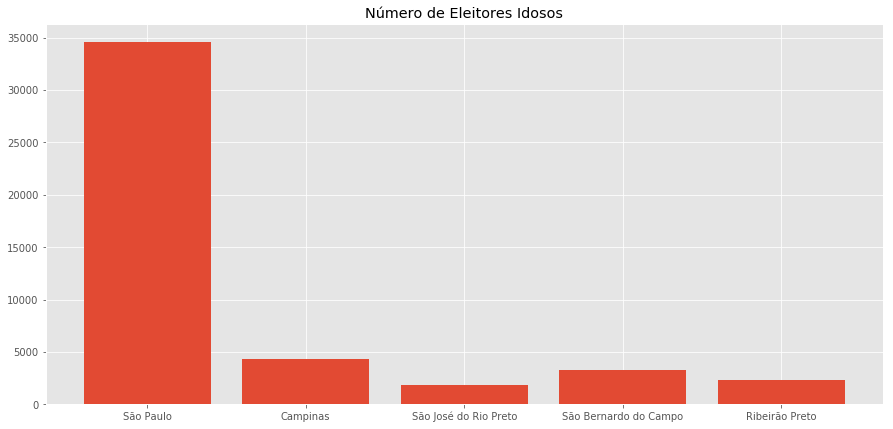

In [538]:
plt.bar(cidades, QtdIdosos)
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (15,7)
plt.title('Número de Eleitores Idosos')
plt.show()

O gráfico nos aponta uma diferença bem grande entre a cidade de São Paulo e as outras cidades. Porém, as nossas outras quatro cidades estão com valores aproximados, por isso iremos analisar os números através de um DataFrame também.

In [537]:
muni = {'São Paulo': [sum(idosos(faixaEtariaSP))], 'Campinas' : [sum(idosos(faixaEtariaCAMP))],'São José do Rio Preto':[sum(idosos(faixaEtariaSJRP))], 'São Bernardo do Campo':[sum(idosos(faixaEtariaSBC))],'Ribeirão Preto':[sum(idosos(faixaEtariaRP))]}
df = pd.DataFrame(data=muni)
df.head()

,São Paulo,Campinas,São José do Rio Preto,São Bernardo do Campo,Ribeirão Preto
0,34595,4326,1827,3273,2319


Como esperado, São Paulo é a cidade com o maior número de eleitores idosos, isso provavelmente se deve a quantidade de pessoas que residem na cidade, que é um número bem maior comparado as outras. Por conta disso, também iremos analisar as cidades separadamente, relacionando a porcentagem de idosos para o número total de eleitores.

Primeiro iremos agrupar as diferentes faixa etarias e separar de acordo com o município

In [459]:
totalEleitoresSP = [sum(idosos(faixaEtariaSP)), sum(dezenove(faixaEtariaSP)), sum(vinte(faixaEtariaSP)),sum(trinta(faixaEtariaSP)),sum(quarenta(faixaEtariaSP)),sum(cinquenta(faixaEtariaSP))]
totalEleitoresCAMP = [sum(idosos(faixaEtariaCAMP)), sum(dezenove(faixaEtariaCAMP)), sum(vinte(faixaEtariaCAMP)),sum(trinta(faixaEtariaCAMP)),sum(quarenta(faixaEtariaCAMP)),sum(cinquenta(faixaEtariaCAMP))]
totalEleitoresSJRP = [sum(idosos(faixaEtariaSJRP)), sum(dezenove(faixaEtariaSJRP)), sum(vinte(faixaEtariaSJRP)),sum(trinta(faixaEtariaSJRP)),sum(quarenta(faixaEtariaSJRP)),sum(cinquenta(faixaEtariaSJRP))]
totalEleitoresSBC = [sum(idosos(faixaEtariaSBC)), sum(dezenove(faixaEtariaSBC)), sum(vinte(faixaEtariaSBC)),sum(trinta(faixaEtariaSBC)),sum(quarenta(faixaEtariaSBC)),sum(cinquenta(faixaEtariaSBC))]
totalEleitoresRP = [sum(idosos(faixaEtariaRP)), sum(dezenove(faixaEtariaRP)), sum(vinte(faixaEtariaRP)),sum(trinta(faixaEtariaRP)),sum(quarenta(faixaEtariaRP)),sum(cinquenta(faixaEtariaRP))]

Para facilitar nosso trabalho, vamos criar uma função para fazer os gráficos

In [460]:
def grafico(y):
    plt.figure(figsize=(10,10))
    labels = ['+ 60 anos','19 anos ou menos','20 a 29 anos','30 a 39 anos','40 a 49 anos','50 a 59 anos']
    colors = ['#99C68E', '#EEE8AA', '#A43820', '#4DBCD3', '#B8860B', '#D8BFD8']
    explode = (.1, 0,.1, 0, .1, 0)
    plt.pie(y, labels=labels ,  autopct='%1.1f%%', colors=colors,
        shadow=True, explode=explode)
              
    return plt.show()



#### Eleitores da cidade de São Paulo

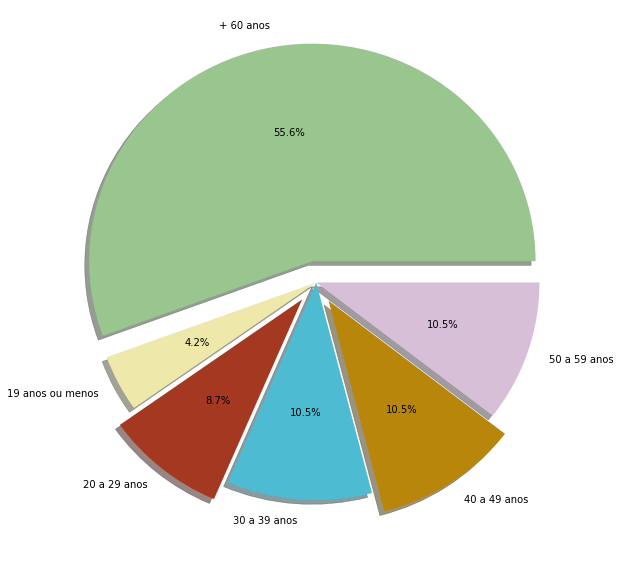

In [530]:
grafico(totalEleitoresSP)

#### Eleitores da cidade de Campinas

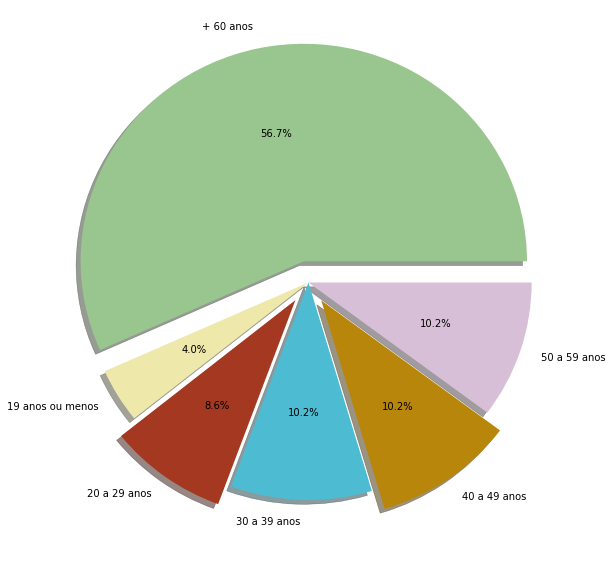

In [471]:
grafico(totalEleitoresCAMP)

#### Eleitores da cidade de São José do Rio Preto

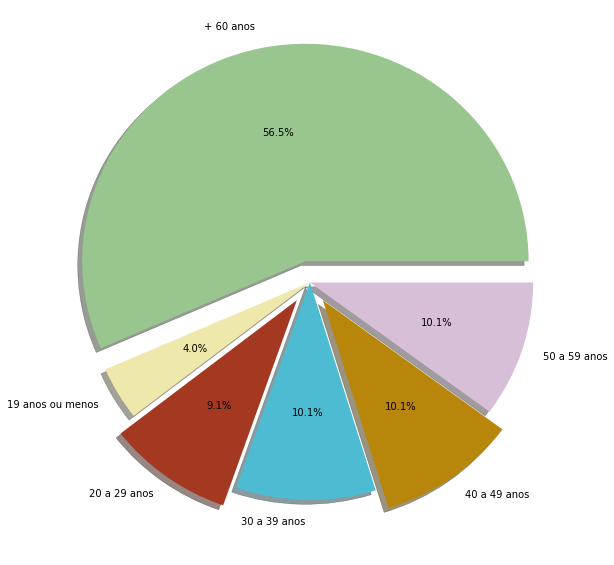

In [470]:
grafico(totalEleitoresSJRP)

#### Eleitores da cidade de São Bernardo do Campo

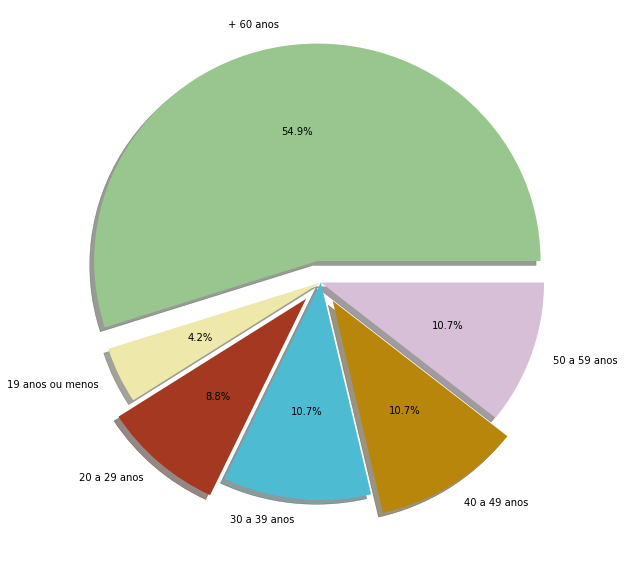

In [469]:
grafico(totalEleitoresSBC)

#### Eleitores da cidade de Ribeiro Preto

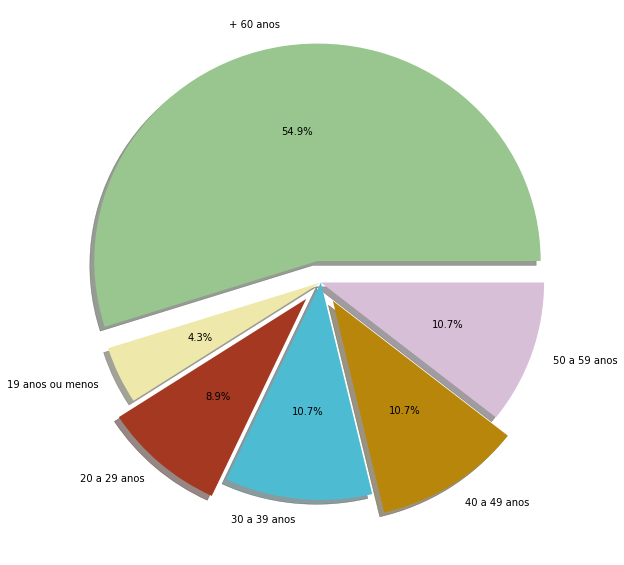

In [467]:
grafico(totalEleitoresRP)

Diferente do outro gráfico, ao analisarmos cada cidade separadamente, vemos que a quantidade de eleitores idosos em relação ao número total de eleitores ficaram muito próximos uma das outras, com uma diferença até descartavél. E em todas as cidade, podemos perceber que o grupo de eleitores idosos representam mais da metade do eleitorado total.